# PROBLEM STATEMENT
Health is real wealth in the pandemic time we all realized the brute effects of covid-19 on all
irrespective of any status. You are required to analyze this health and medical data for better
future preparation.
Do ETL: Extract- Transform and Load data from the heart disease diagnostic database
You can perform EDA through python. The database extracts various information such as
Heart disease rates, Heart disease by gender, by age.
You can even compare attributes of the data set to extract necessary information. Make the
necessary dashboard with the best you can extract from the data. Use various visualization
and features and make the best dashboard
Find key metrics and factors and show the meaningful relationships between attributes.
Do your own research and come up with your findings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nbformat
import warnings


In [2]:
df=pd.read_csv(r"C:\Users\91958\Downloads\dataset (2).csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# INFORMATION ABOUT DATASET

1. age           age in years
2. sex           (1 = male; 0 = female)
3. cp            chest pain type
4. trestbps      resting blood pressure (in mm Hg on admission to the hospital)
5. chol          serum cholestoral in mg/dl
6. fbs           (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg       resting electrocardiographic results
8. thalach       maximum heart rate achieved
9. exang         exercise induced angina (1 = yes; 0 = no)
10. oldpeak      ST depression induced by exercise relative to rest
11. slope        the slope of the peak exercise ST segment
12. ca           number of major vessels (0-3) colored by flourosopy
13. thal         3 = normal; 6 = fixed defect; 7 = reversable defect
14. target       1 or 0

In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.shape

(303, 14)

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [8]:
df['sex'] = df['sex'].astype('category')

# Calculate the correlation matrix

In [9]:
corr_matrix = df.corr()
print(corr_matrix)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

# Visualize the correlation matrix

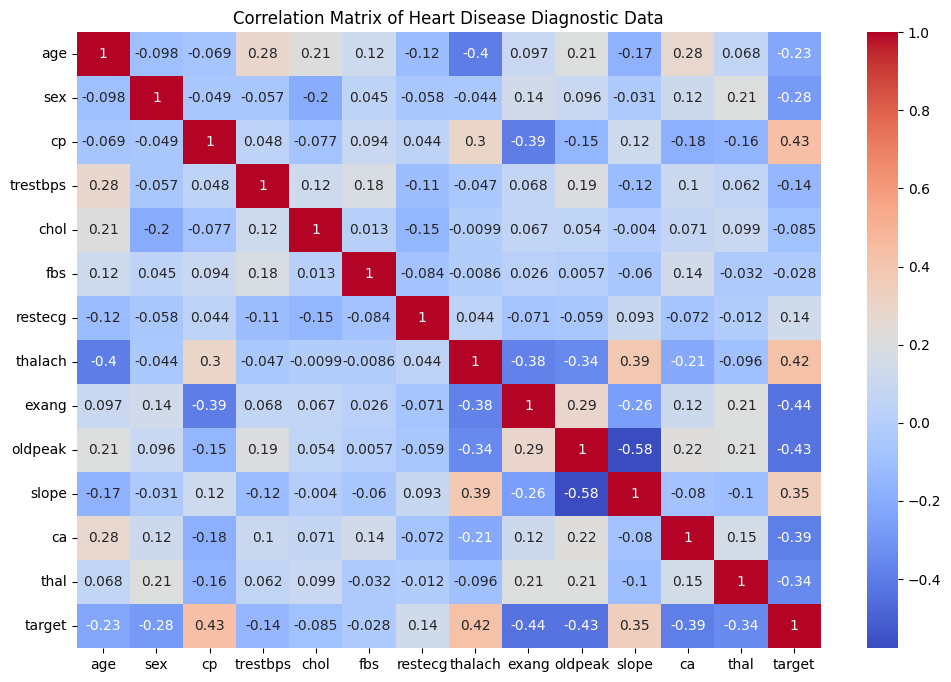

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Heart Disease Diagnostic Data')
plt.show()

In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Visualize the distribution of gender in the dataset.

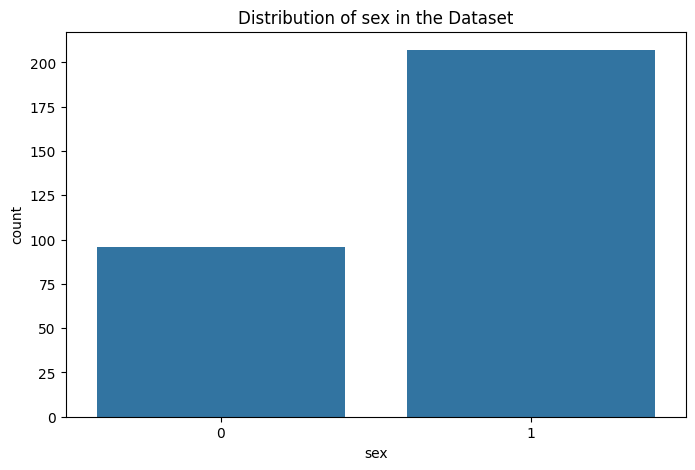

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', data=df)
plt.title('Distribution of sex in the Dataset')
plt.show()

# Distribution of Age

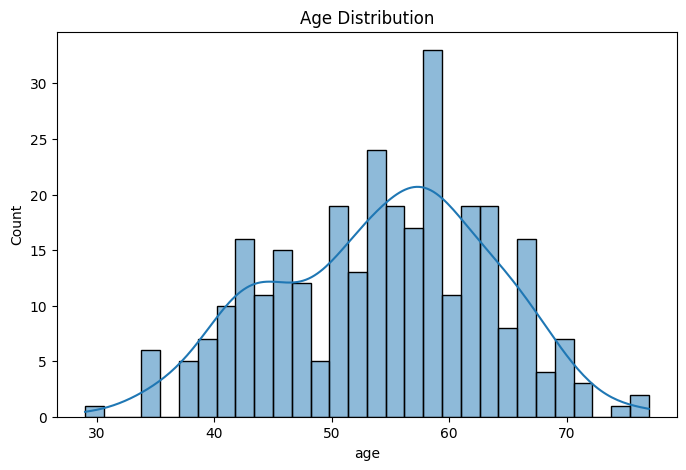

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# Heart Disease by Age Group

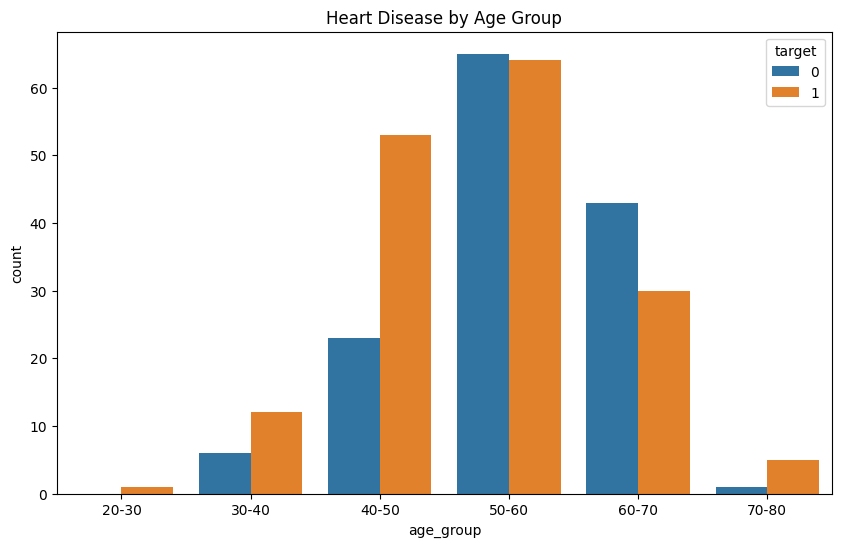

In [14]:
df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='target', data=df)
plt.title('Heart Disease by Age Group')
plt.show()

# Heart Disease by Gender

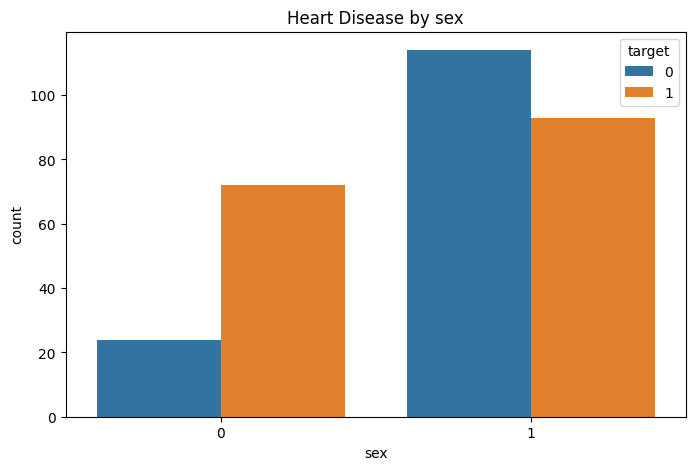

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', hue='target', data=df)
plt.title('Heart Disease by sex')
plt.show()

# Pair Plot for Detailed EDA

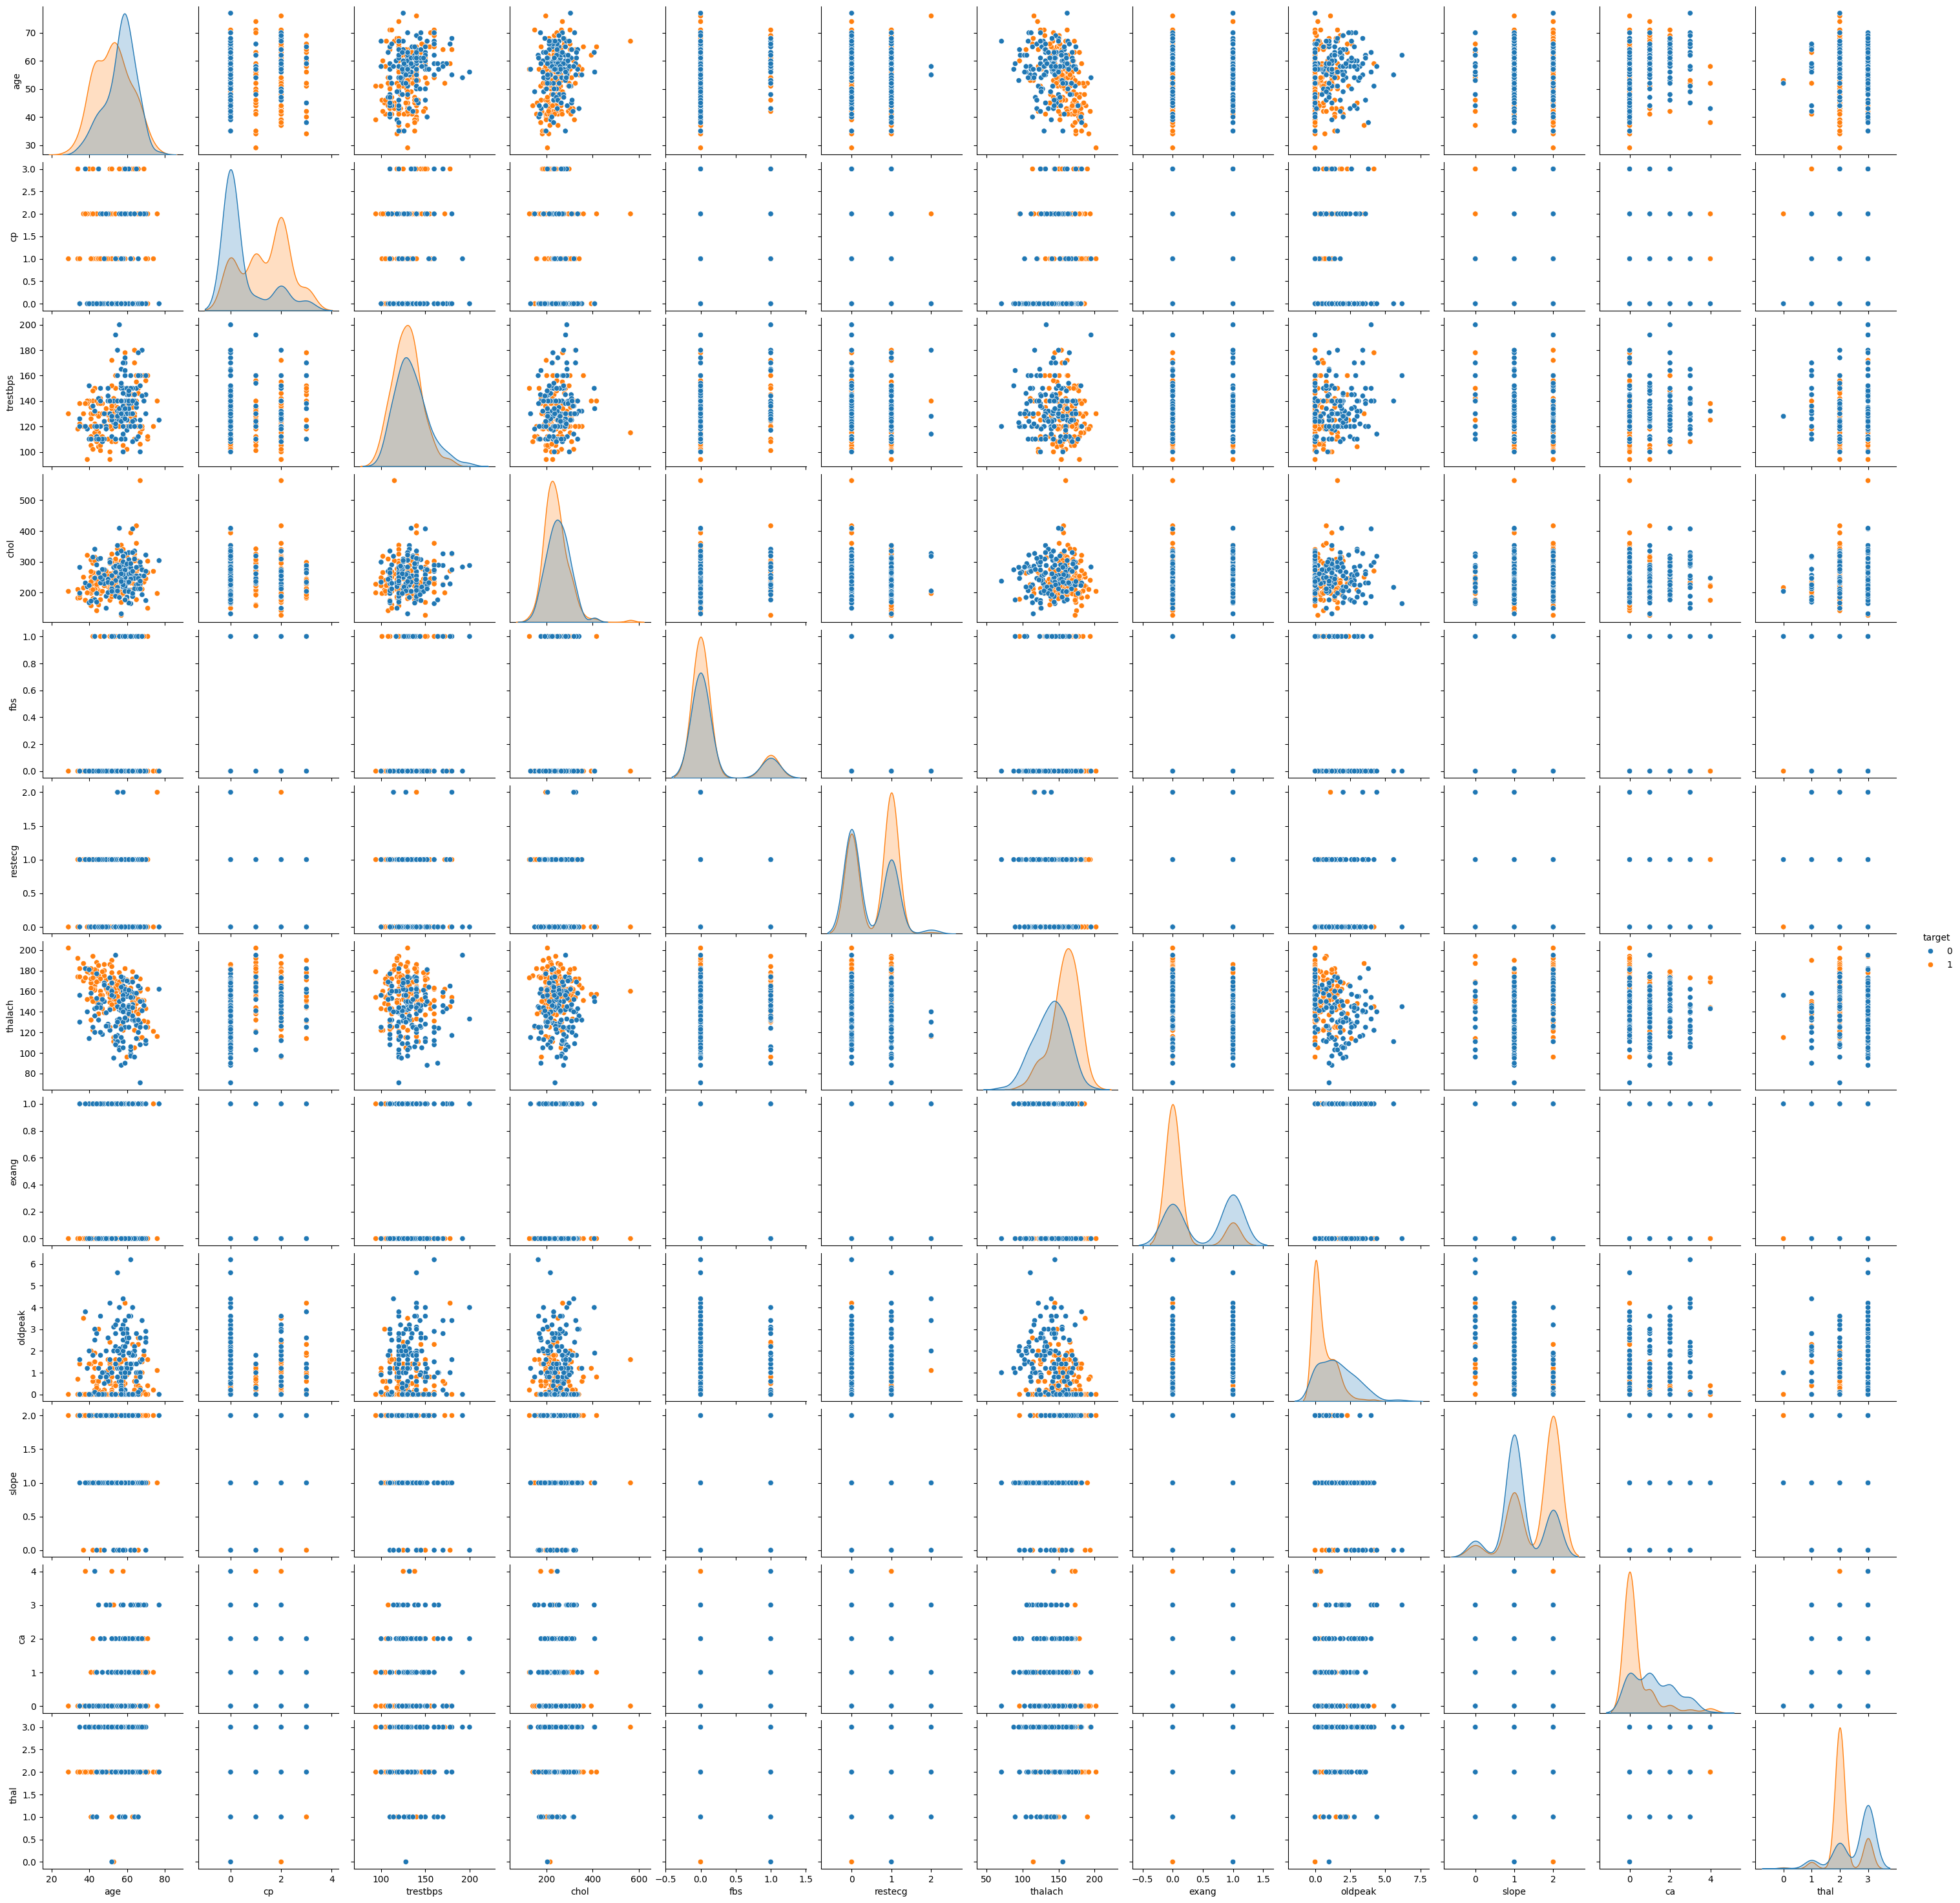

In [16]:
sns.pairplot(df, hue='target')
plt.show()

 # Cholesterol vs. Age

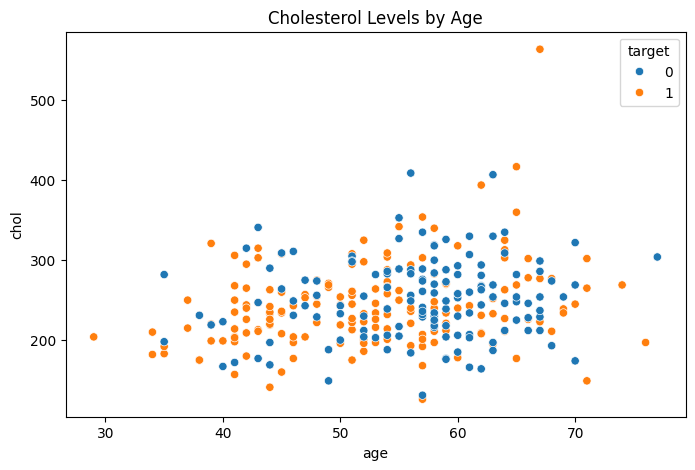

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='chol', hue='target', data=df)
plt.title('Cholesterol Levels by Age')
plt.show()

# Blood Pressure vs. Age

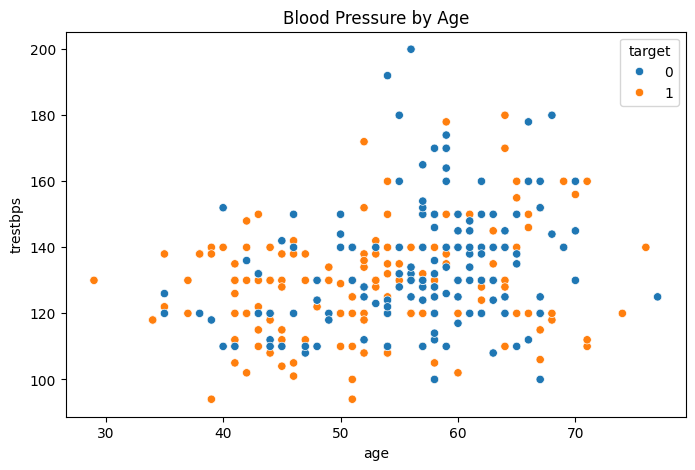

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='trestbps', hue='target', data=df)
plt.title('Blood Pressure by Age')
plt.show()


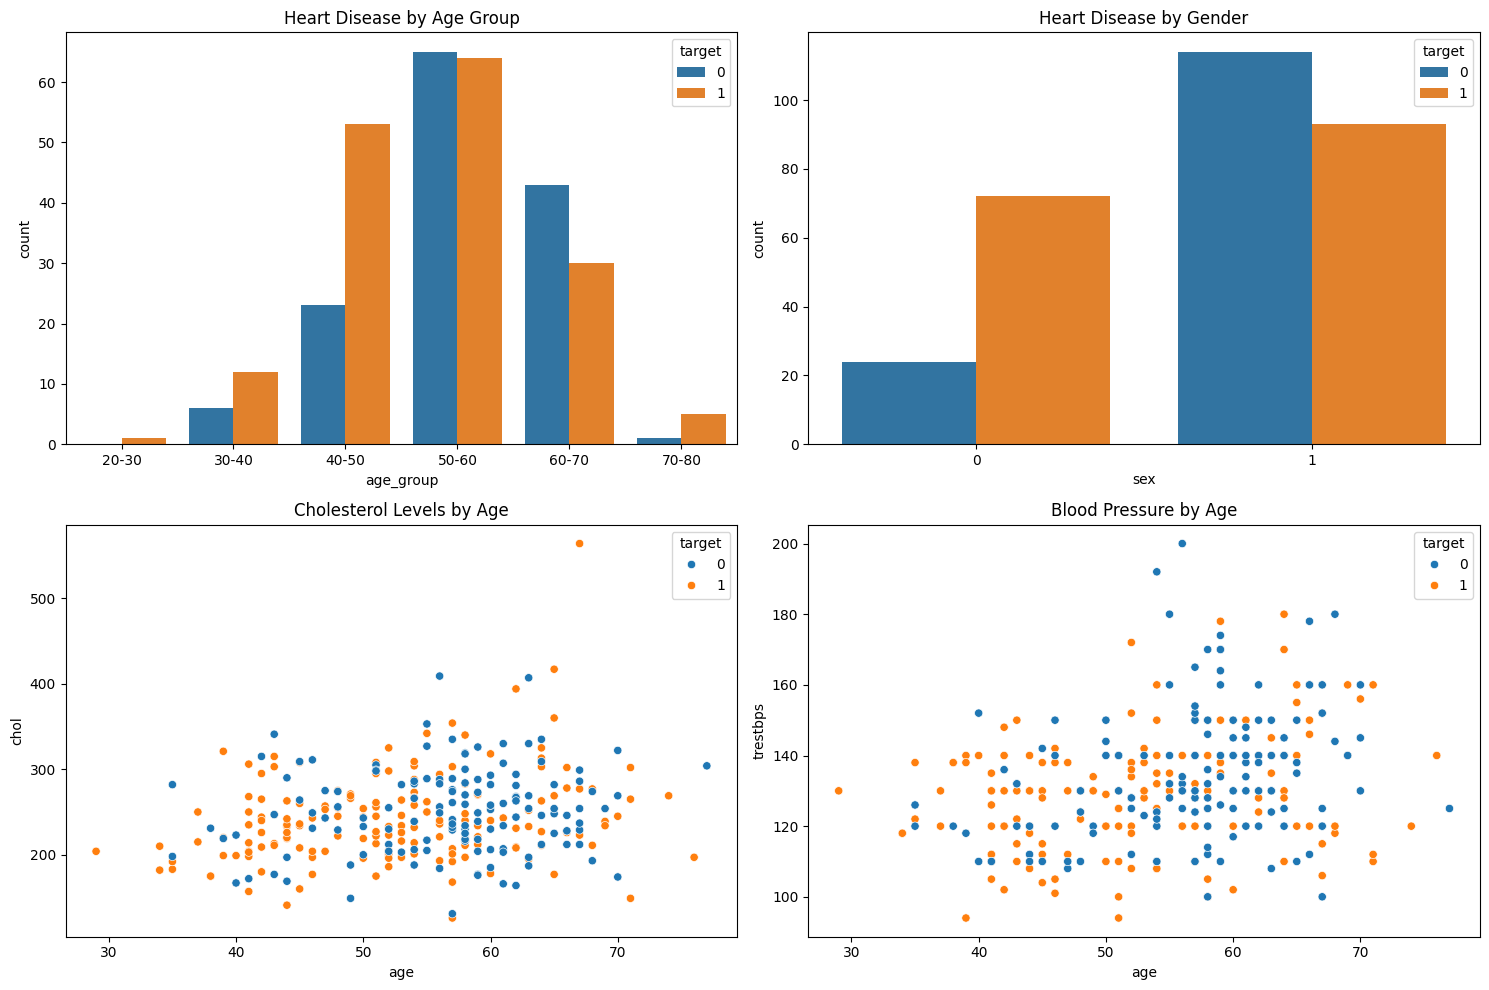

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Heart Disease by Age Group
sns.countplot(x='age_group', hue='target', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Heart Disease by Age Group')

# Heart Disease by Gender
sns.countplot(x='sex', hue='target', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Heart Disease by Gender')

# Cholesterol Levels by Age
sns.scatterplot(x='age', y='chol', hue='target', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Cholesterol Levels by Age')

# Blood Pressure by Age
sns.scatterplot(x='age', y='trestbps', hue='target', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Blood Pressure by Age')

plt.tight_layout()
plt.show()


In [20]:
mean_cholesterol = df.groupby('target')['chol'].mean()
print('Mean Cholesterol Levels:')
print(mean_cholesterol)


Mean Cholesterol Levels:
target
0    251.086957
1    242.230303
Name: chol, dtype: float64


#  Cholesterol Distribution by Gender

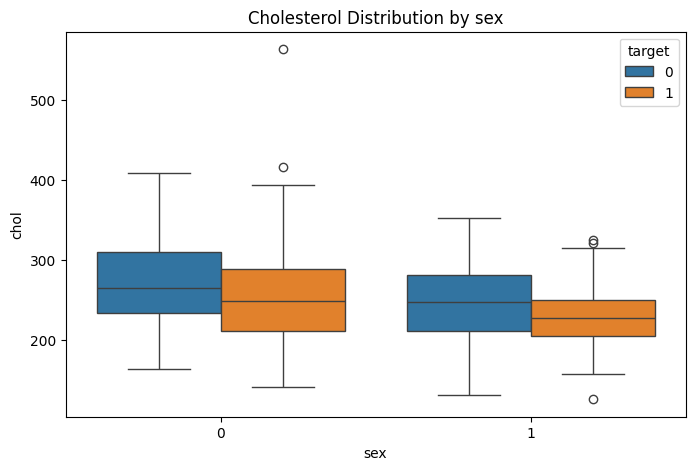

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='sex', y='chol', hue='target', data=df)
plt.title('Cholesterol Distribution by sex')
plt.show()


# Blood Pressure Distribution by Age Group

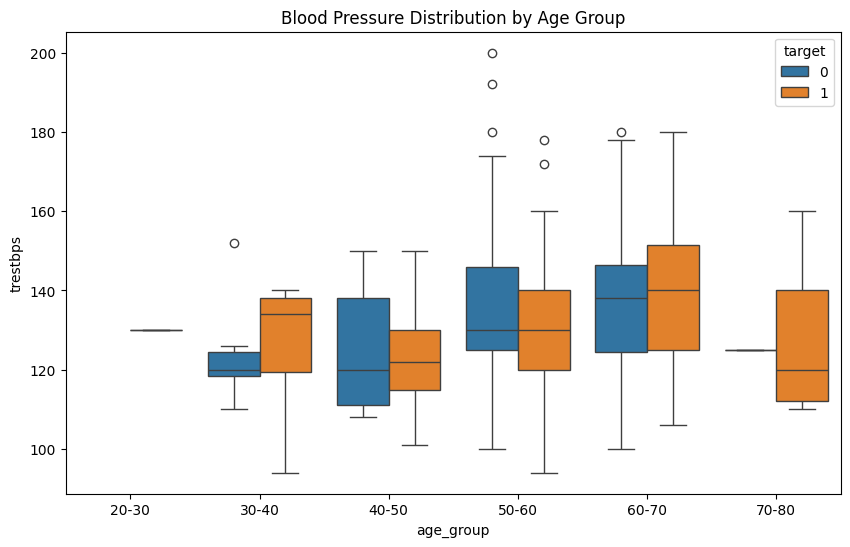

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='trestbps', hue='target', data=df)
plt.title('Blood Pressure Distribution by Age Group')
plt.show()


# Heart Disease by Chest Pain Type

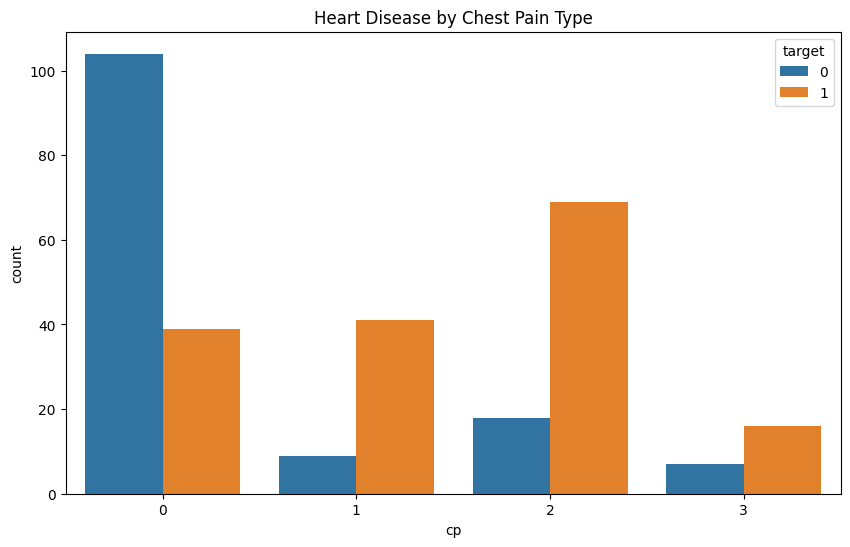

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='target', data=df)
plt.title('Heart Disease by Chest Pain Type')
plt.show()


# Heatmap of Age Group vs. Chest Pain Type

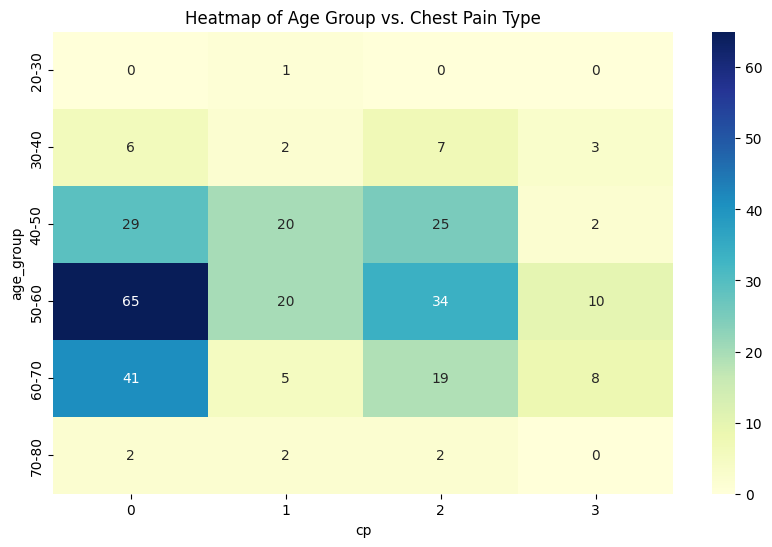

In [24]:
plt.figure(figsize=(10, 6))
heatmap_data = pd.crosstab(df['age_group'], df['cp'])
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Age Group vs. Chest Pain Type')
plt.show()


# Joint Plot of Age and Cholestero

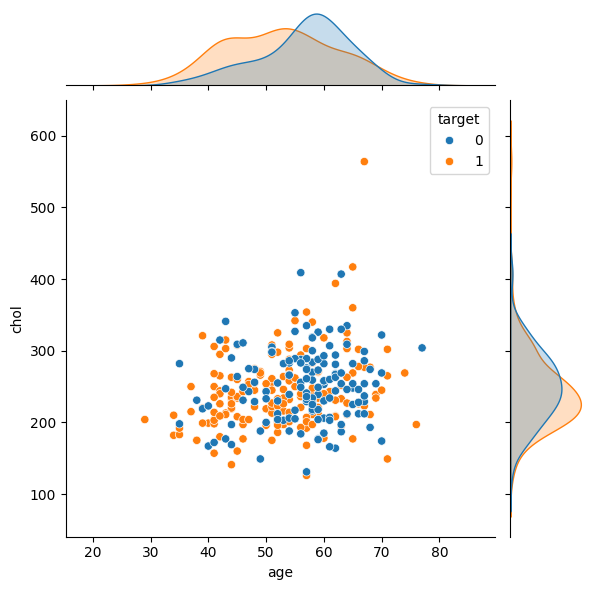

In [25]:
sns.jointplot(x='age', y='chol', data=df, kind='scatter', hue='target')
plt.show()


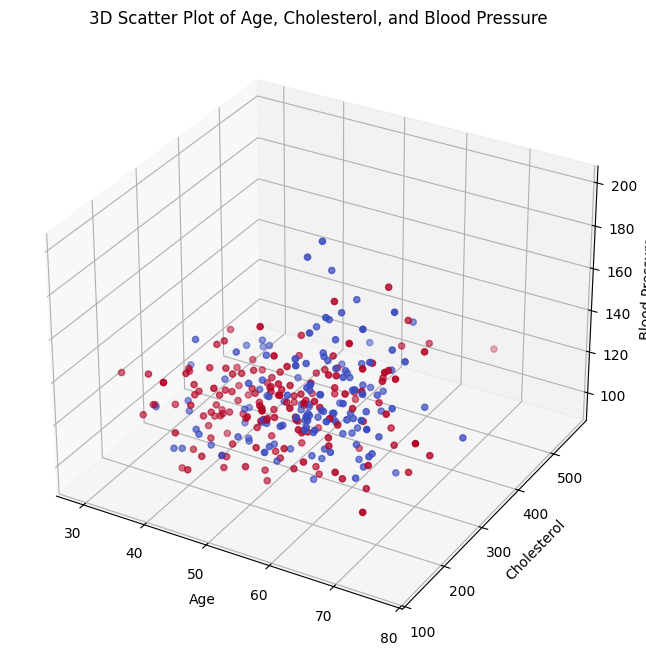

In [26]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['age'], df['chol'], df['trestbps'], c=df['target'], cmap='coolwarm')
ax.set_xlabel('Age')
ax.set_ylabel('Cholesterol')
ax.set_zlabel('Blood Pressure')
plt.title('3D Scatter Plot of Age, Cholesterol, and Blood Pressure')
plt.show()
